<p style="font-family: 'Helvetica', sans-serif; font-size: 20px; color: rgb(0, 2, 161);">
    <li> Does the original image need to enhance? (use original image histogram to prove your answer)</li></br> 
    <li> enhance the original image to output image using contrast enhancement ways?</li> </br>
    <li> Plot the output image histogram </li> </p>

<img src='./img/original.jpg'  alt="Image 1" style="width: 40%; display: inline;" />
<img src='./img/output.jpg'    alt="Image 2" style="width: 40%; display: inline;" />


## EX01:
### Does the original image need to enhance? (use original image histogram to prove your answer) 

In [76]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [77]:
image = cv2.imread('./original.jpg',0)

In [78]:
def show_img_plt(image, c_map='gray', fig_height=8, fig_width=6):
    plt.figure(figsize=(fig_width, fig_height), dpi=100)
    plt.imshow(image, cmap=c_map)

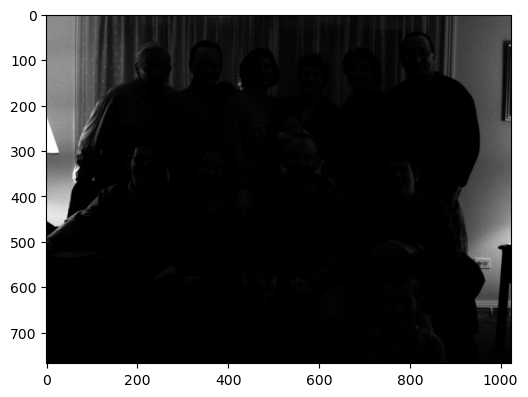

In [79]:
show_img_plt(image)

In [80]:
def show_histogram(image, bins=256, range=(0, 256)):
    plt.figure()
    plt.hist(image.ravel(), bins, range)

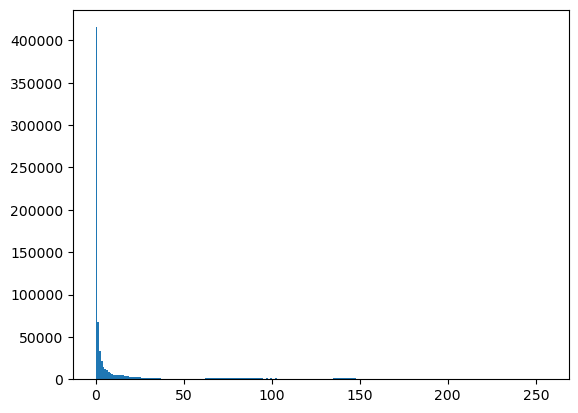

In [81]:
show_histogram(image)

با توجه به نمودار هیستوگرام شدت پیکسل ها از ۰ تا ۵۰ هست بنابراین تصویر نیاز به بهبود دارد  

## EX02: 
### enhance the original image to output image using contrast enhancement ways?
#### 
#### the ways: contrast streching | Contrast clipping | gamma | Histogram equalization

In [87]:
def contrast_streching(image):
    min_val = np.min(image)
    max_val = np.max(image)
    img_stretched = (image - min_val) * (255 / (max_val - min_val))
    return img_stretched.astype(np.uint8)

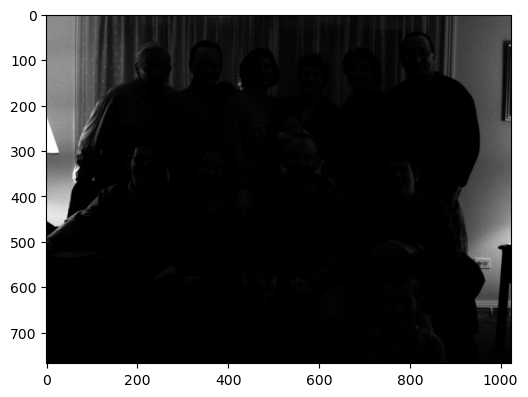

In [88]:
img_stretched = contrast_streching(image)
show_img_plt(img_stretched)

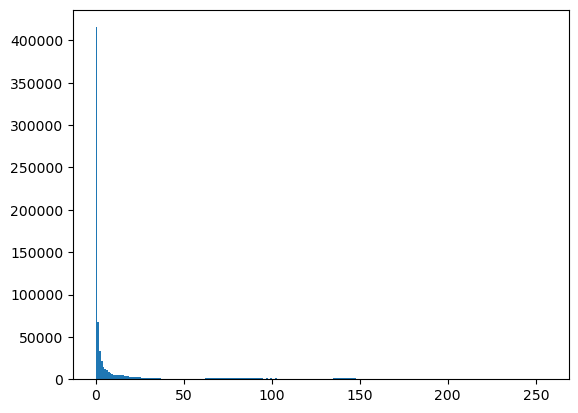

In [89]:
show_histogram(img_stretched)

In [96]:
def contrast_clipping(image):
    
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])

    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf[-1]

    cdf_min_val = bins[np.where(cdf_normalized > 0.01)[0][0]]
    cdf_max_val = bins[np.where(cdf_normalized < 0.99)[0][-1]]

    img_clipped = np.clip(image, cdf_min_val, cdf_max_val)

    cs_clipped_img = contrast_streching(img_clipped)
    return cs_clipped_img

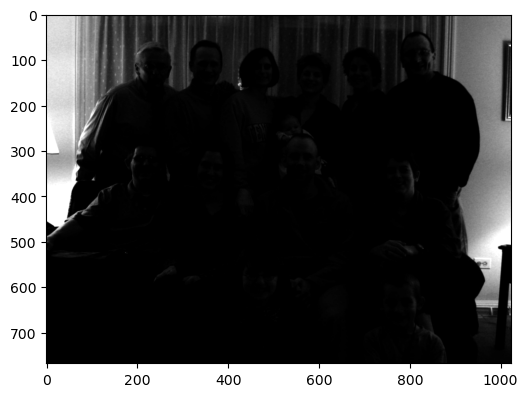

In [97]:
show_img_plt(contrast_clipping(image))

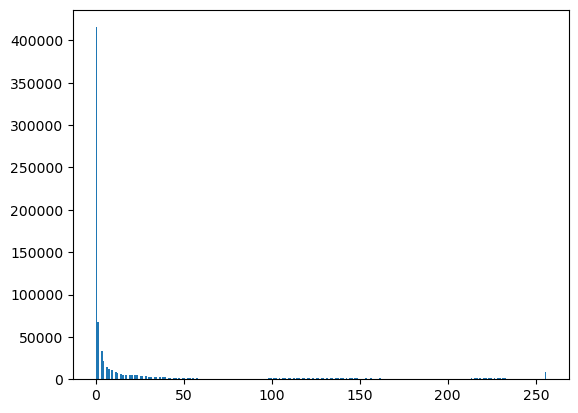

In [99]:
show_histogram(contrast_clipping(image))

### Histogram equalization

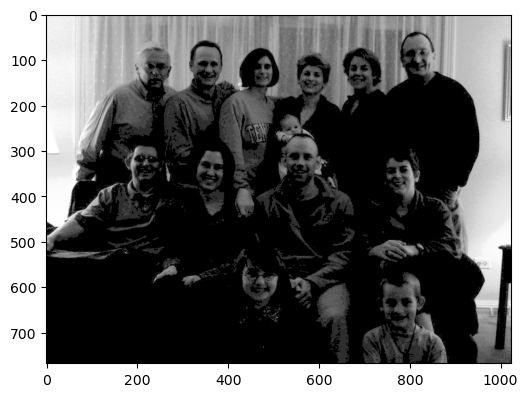

In [115]:
equalized_image = cv2.equalizeHist(image)

show_img_plt(equalized_image)

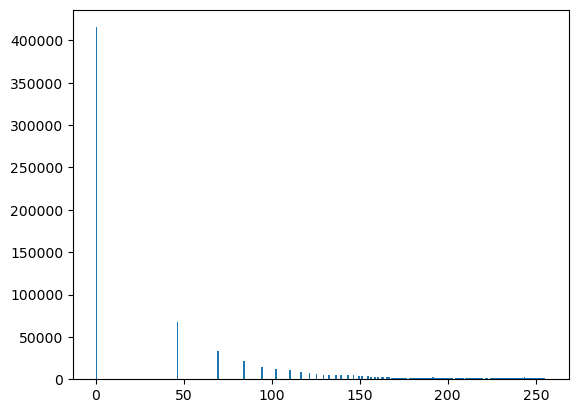

In [116]:
show_histogram(equalized_image)

### gamma

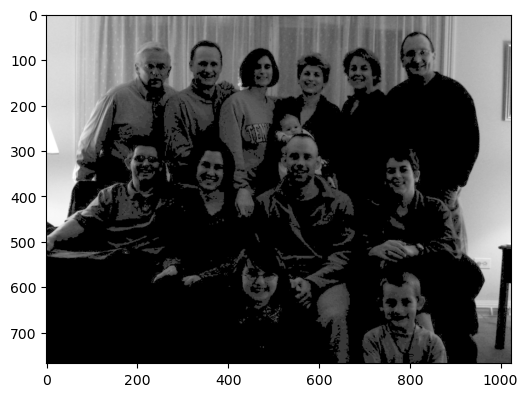

In [108]:
gamma = 0.27
image_Gamma = np.uint8(((image/255)**gamma)*255)

show_img_plt(image_Gamma)

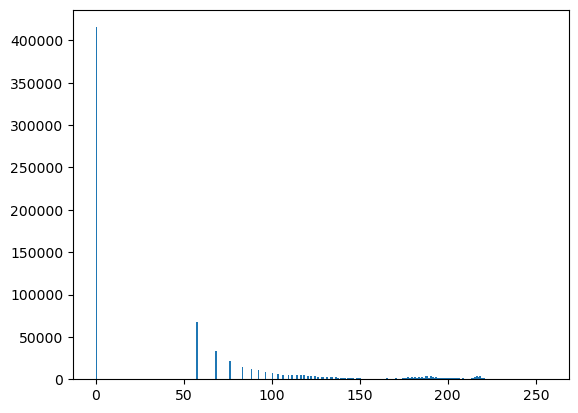

In [110]:
show_histogram(image_Gamma)

## EX03
### Plot the output image histogram

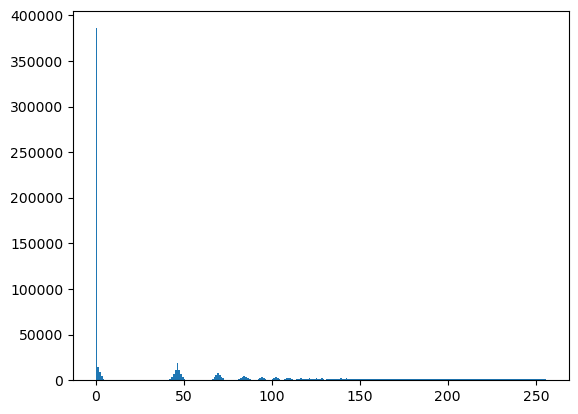

In [112]:
output_img = cv2.imread('./output.jpg',0)
show_histogram(output_img)